In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
    
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise

In [3]:
x_df = pd.DataFrame(data = x_data, columns = ['x_data'])
y_df = pd.DataFrame(data = y_true, columns = ['y'])
my_data = pd.concat([x_df, y_df], axis = 1)

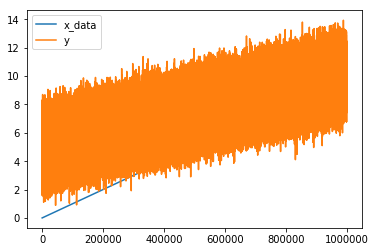

In [4]:
my_data.plot()

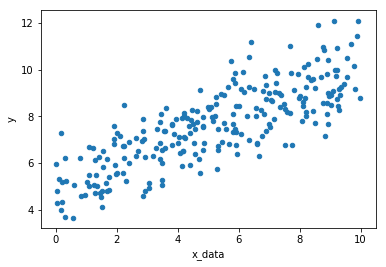

In [5]:
my_data.sample(n=250).plot(kind ='scatter', x='x_data', y = 'y')

In [6]:
batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [7]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [8]:
y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph - y_model))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_index = np.random.randint(len(x_data), size = batch_size)
        
        feed = {xph:x_data[rand_index], yph:y_true[rand_index]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

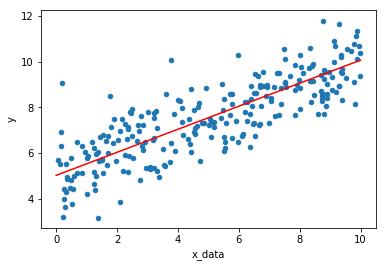

In [10]:
y_hat = model_m*x_data + model_b
my_data.sample(n=250).plot(kind ='scatter', x='x_data', y = 'y')
plt.plot(x_data, y_hat,'r')